In [24]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
#Create a set of random latitiue and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats,lngs)

lat_lngs

In [3]:
#Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [4]:
#Create a list for holding cities

cities = []

#Identify the nearest city for each lat and long combination

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    
    #If the city is unique, thenwe will add it to the cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count

len(cities)

642

In [5]:
import time
from datetime import datetime
import requests
from config import weather_api_key

In [6]:
#Starting URL for weather map API call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b28dcc5e463f7b111d3293485ed3f598'

In [7]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.

record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    
     # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
 

    
    # Run an API request for each of the cities.
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
    
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | lavrentiya
Processing Record 3 of Set 1 | guerrero negro
Processing Record 4 of Set 1 | mount gambier
Processing Record 5 of Set 1 | ngunguru
Processing Record 6 of Set 1 | bambous virieux
Processing Record 7 of Set 1 | gillette
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | khatanga
Processing Record 10 of Set 1 | gobabis
Processing Record 11 of Set 1 | narsaq
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | samusu
City not found. Skipping...
Processing Record 14 of Set 1 | kruisfontein
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | boca do acre
Processing Record 18 of Set 1 | vytegra
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | iluliss

Processing Record 38 of Set 4 | jinchengjiang
City not found. Skipping...
Processing Record 39 of Set 4 | rovinj
Processing Record 40 of Set 4 | tortosa
Processing Record 41 of Set 4 | dongsheng
Processing Record 42 of Set 4 | atar
Processing Record 43 of Set 4 | vostok
Processing Record 44 of Set 4 | imbituba
Processing Record 45 of Set 4 | talnakh
Processing Record 46 of Set 4 | lima
Processing Record 47 of Set 4 | krutikha
Processing Record 48 of Set 4 | mahajanga
Processing Record 49 of Set 4 | xushan
Processing Record 50 of Set 4 | georgetown
Processing Record 1 of Set 5 | rolla
Processing Record 2 of Set 5 | katsuura
Processing Record 3 of Set 5 | antalaha
Processing Record 4 of Set 5 | mitu
Processing Record 5 of Set 5 | victoria
Processing Record 6 of Set 5 | tharad
Processing Record 7 of Set 5 | vila franca do campo
Processing Record 8 of Set 5 | oskaloosa
Processing Record 9 of Set 5 | flinders
Processing Record 10 of Set 5 | valle de juarez
Processing Record 11 of Set 5 | su

Processing Record 28 of Set 8 | westport
Processing Record 29 of Set 8 | aksarka
Processing Record 30 of Set 8 | abu dhabi
Processing Record 31 of Set 8 | innisfail
Processing Record 32 of Set 8 | guanagazapa
Processing Record 33 of Set 8 | husavik
Processing Record 34 of Set 8 | bafoulabe
Processing Record 35 of Set 8 | sao filipe
Processing Record 36 of Set 8 | marcona
City not found. Skipping...
Processing Record 37 of Set 8 | saint-joseph
Processing Record 38 of Set 8 | necochea
Processing Record 39 of Set 8 | kutum
Processing Record 40 of Set 8 | dumalag
Processing Record 41 of Set 8 | basoko
Processing Record 42 of Set 8 | leshukonskoye
Processing Record 43 of Set 8 | ust-maya
Processing Record 44 of Set 8 | kikwit
Processing Record 45 of Set 8 | klaksvik
Processing Record 46 of Set 8 | dovers
Processing Record 47 of Set 8 | cap malheureux
Processing Record 48 of Set 8 | yinchuan
Processing Record 49 of Set 8 | kambove
Processing Record 50 of Set 8 | namatanai
Processing Record 1

Processing Record 15 of Set 12 | cuenca
Processing Record 16 of Set 12 | gamboma
Processing Record 17 of Set 12 | brae
Processing Record 18 of Set 12 | alyangula
Processing Record 19 of Set 12 | rio grande
Processing Record 20 of Set 12 | nador
Processing Record 21 of Set 12 | el faiyum
City not found. Skipping...
Processing Record 22 of Set 12 | barcelos
Processing Record 23 of Set 12 | cidreira
Processing Record 24 of Set 12 | maroantsetra
Processing Record 25 of Set 12 | xinqing
Processing Record 26 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 27 of Set 12 | mecca
Processing Record 28 of Set 12 | papara
Processing Record 29 of Set 12 | jishou
Processing Record 30 of Set 12 | fukue
Processing Record 31 of Set 12 | shelburne
Processing Record 32 of Set 12 | scottsburgh
City not found. Skipping...
Processing Record 33 of Set 12 | hualmay
Processing Record 34 of Set 12 | pangnirtung
Processing Record 35 of Set 12 | zachagansk
City not found. Skipping...
Processing 

In [8]:
len(city_data)

589

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,-3.91,81,99,5.44,GL,2022-04-19 22:50:59
1,Lavrentiya,65.5833,-171.0000,29.93,73,3,5.17,RU,2022-04-19 22:55:09
2,Guerrero Negro,27.9769,-114.0611,68.45,62,93,20.67,MX,2022-04-19 22:52:21
3,Mount Gambier,-37.8333,140.7667,55.31,94,40,6.91,AU,2022-04-19 22:55:09
4,Ngunguru,-35.6167,174.5000,67.91,94,63,15.97,NZ,2022-04-19 22:55:10
5,Bambous Virieux,-20.3428,57.7575,79.21,94,40,6.91,MU,2022-04-19 22:55:10
6,Gillette,44.2911,-105.5022,64.11,23,100,15.01,US,2022-04-19 22:55:10
7,Ushuaia,-54.8000,-68.3000,47.86,66,40,10.36,AR,2022-04-19 22:55:11
8,Khatanga,71.9667,102.5000,-4.31,100,99,4.23,RU,2022-04-19 22:55:11
9,Gobabis,-22.4500,18.9667,59.54,43,27,9.42,NA,2022-04-19 22:55:11


In [10]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [19]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2022-04-19 22:50:59,77.4840,-69.3632,-3.91,81,99,5.44
1,Lavrentiya,RU,2022-04-19 22:55:09,65.5833,-171.0000,29.93,73,3,5.17
2,Guerrero Negro,MX,2022-04-19 22:52:21,27.9769,-114.0611,68.45,62,93,20.67
3,Mount Gambier,AU,2022-04-19 22:55:09,-37.8333,140.7667,55.31,94,40,6.91
4,Ngunguru,NZ,2022-04-19 22:55:10,-35.6167,174.5000,67.91,94,63,15.97
...,...,...,...,...,...,...,...,...,...
584,Namibe,AO,2022-04-19 23:10:19,-15.1961,12.1522,75.51,79,100,2.28
585,Zlobin,HR,2022-04-19 23:10:19,45.2924,14.6541,40.37,67,75,18.41
586,Kalmunai,LK,2022-04-19 23:10:19,7.4167,81.8167,79.92,82,99,1.90
587,Ikoma,JP,2022-04-19 23:10:20,34.6833,135.7000,60.80,42,8,3.04


In [20]:
# Create the output file (CSV)

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1650419374.5671544

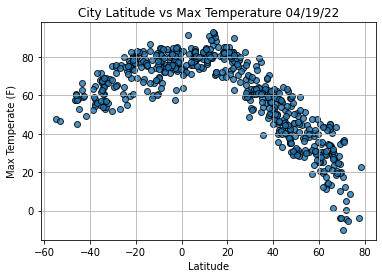

In [26]:
#Build the scatter plot for latitude vs max temperature

plt.scatter(lats, max_temps, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label="Cities")

#Incorporate the other graph properties

plt.title (f'City Latitude vs Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperate (F)')
plt.xlabel('Latitude')
plt.grid(True)

#save the figure

plt.savefig('weather_data/Fig1.png')

#Show plot
plt.show()

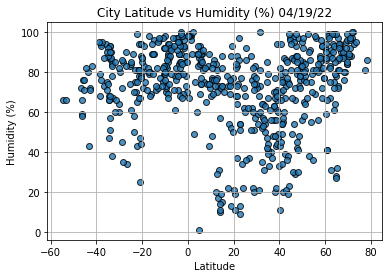

In [28]:
#Build the scatter plot for latitude vs humidity

plt.scatter(lats, humidity, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label="Cities")

#Incorporate the other graph properties

plt.title (f'City Latitude vs Humidity (%) ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#save the figure

plt.savefig('weather_data/Fig2.png')

#Show plot
plt.show()

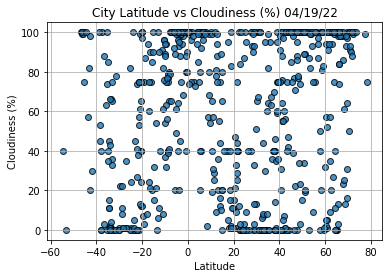

In [29]:
#Build the scatter plot for latitude vs cloudiness

plt.scatter(lats, cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label="Cities")

#Incorporate the other graph properties

plt.title (f'City Latitude vs Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#save the figure

plt.savefig('weather_data/Fig3.png')

#Show plot
plt.show()

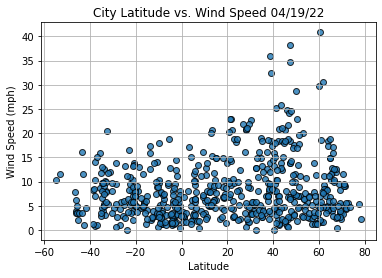

In [30]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [32]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
index13 = city_data_df.loc[13]
index13

City                    Jamestown
Country                        US
Date          2022-04-19 22:50:36
Lat                        42.097
Lng                      -79.2353
Max Temp                    35.71
Humidity                       75
Cloudiness                    100
Wind Speed                  18.41
Name: 13, dtype: object

In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2022-04-19 22:50:59,77.4840,-69.3632,-3.91,81,99,5.44
1,Lavrentiya,RU,2022-04-19 22:55:09,65.5833,-171.0000,29.93,73,3,5.17
2,Guerrero Negro,MX,2022-04-19 22:52:21,27.9769,-114.0611,68.45,62,93,20.67
6,Gillette,US,2022-04-19 22:55:10,44.2911,-105.5022,64.11,23,100,15.01
8,Khatanga,RU,2022-04-19 22:55:11,71.9667,102.5000,-4.31,100,99,4.23


In [36]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

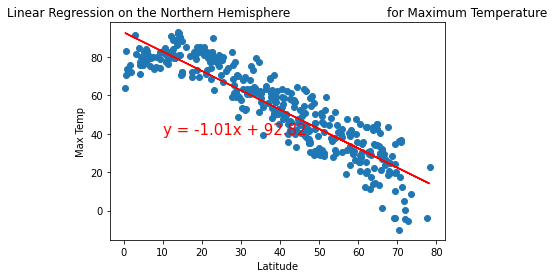

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

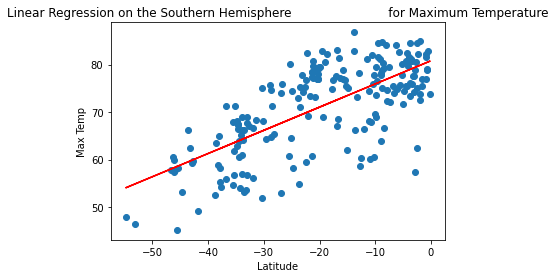

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

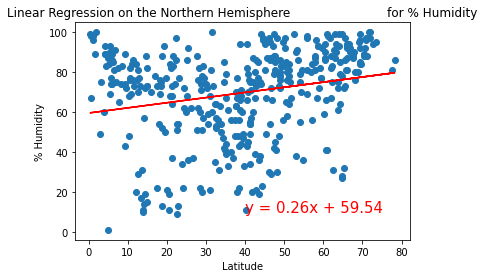

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

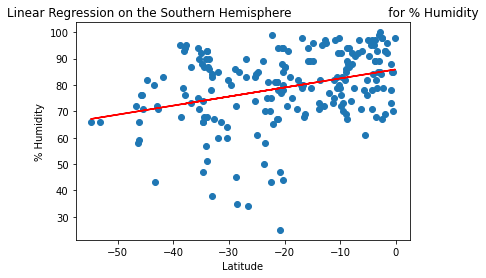

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

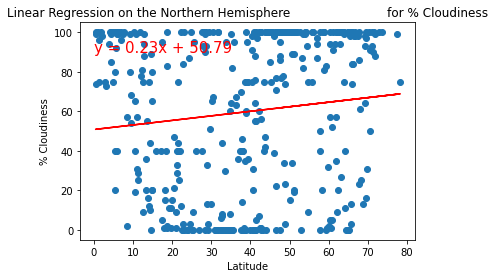

In [43]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,90))

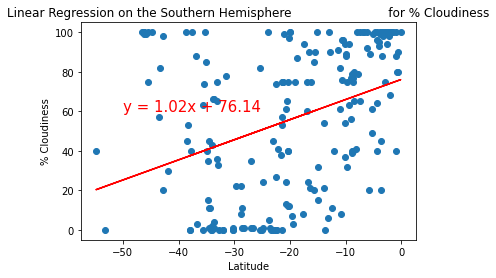

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

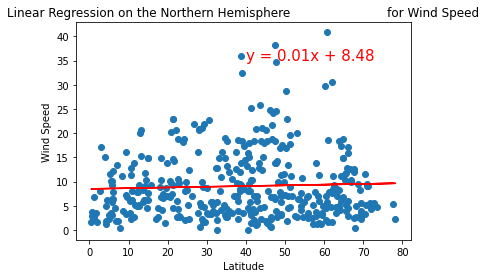

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

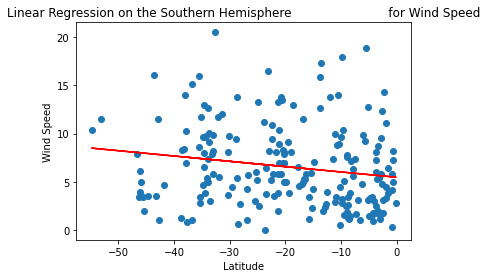

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))